# Predicting Heart disease

_source : https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var_

### Dataset overview
-------

The Heart Disease Prediction dataset on Kaggle contains information from 270 patients who have undergone cardiac catheterizations to determine whether they have heart disease or not.

There are 13 independent variables that provide insight into potential risk factors for heart disease, including age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of narrowed coronary arteries seen on fluoroscopy.

A target variable indicating whether each patient has heart disease or not, is also included.

This dataset provides an opportunity to analyze how these variables interact and their potential correlation with heart disease, allowing researchers and healthcare professionals to develop preventive strategies for patients at risk and improve treatment for those with heart disease.

#### Columns with description
-------
 - Age:	The age of the patient. (Numeric)
 - Sex:	The gender of the patient. (*Categorical*)
 - Chest pain type:	The type of chest pain experienced by the patient. (*Categorical*)
 - BP:	The blood pressure level of the patient. (Numeric)
 - Cholesterol:	The cholesterol level of the patient. (Numeric)
 - FBS over 120:	The fasting blood sugar test results over 120 mg/dl. (Numeric)
 - EKG results:	The electrocardiogram results of the patient. (*Categorical*)
 - Max HR:	The maximum heart rate levels achieved during exercise testing. (Numeric)
 - Exercise angina:	The angina experienced during exercise testing. (*Categorical*)
 - ST depression:	The ST depression on an Electrocardiogram. (Numeric)
 - Slope of ST:	The slope of ST segment electrocardiogram readings. (*Categorical*)
 - Number of vessels fluro:	The amount vessels seen in Fluoroscopy images. (Numeric)
 - Thallium:	The Thallium Stress test findings. (*Categorical*)
 - Heart Disease:	Whether or not the patient has been diagnosed with Heart Disease. (*Categorical*)


#### Categorical features documentation
------

1. Sex:
- 1 = male
- 0 = female 


2. Chest pain type: 
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic 

    
3. Resting electrocardiographic results 
- Value 0: normal 
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

4. FBS over 120
- Value 1: yes
- Value 0: no
 
5. Exercise induced angina 
- Value 1: yes 
- Value 0: no 

6. The slope of the peak exercise ST segment 
- Value 1: upsloping 
- Value 2: flat 
- Value 3: downsloping 


7. Number of major vessels colored by flourosopy 
- Range of values is from 1 to 3

8. Thalium:
- Value 3: normal
- Value 6: fixed defect
- Value 7: reversable defect 


_source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease_ 

### Project objective
--------

Create a prediction model for heart disease using multiple machine learning algorithms and optimizing their hyperparameters.

Steps:

 1. _Perform feature selection to choose the most relevant variables for the model._

 2. _Implement various machine learning algorithms (such as random forest, gradient boost, and regression) and compare their   performance in predicting heart disease._
 
 3. _Optimize the hyperparameters of each algorithm to improve their accuracy._
 
 4. _Evaluate the final model's performance using appropriate metrics._

### Part A. Feature Selection/Engineering
------

#### Disclaimer: I possess no medical expertise. 
It is important however, to have a solid understanding of the data on which the prediction model will be based upon. After some online research, I gathered some important relations between the features of the dataset that can prove helpful while building a robust model for heart disease prediction.

- **Age and blood pressure: Studies have found that blood pressure tends to increase with age, and that high blood pressure is more common among older individuals.**

     _source: Franklin SS, Gustin W, Wong ND, et al. Hemodynamic patterns of age-related changes in blood pressure. The Framingham Heart Study. Circulation. 1997 Apr 1;96(7):308-15. doi: 10.1161/01.cir.96.7.308. PMID: 9323043._

- **Cholesterol levels and chest pain type: One study found that patients with typical angina (a type of chest pain) had higher levels of total cholesterol and LDL cholesterol compared to patients with atypical angina or non-anginal pain.**
     
     _source: Hage FG, Szalai JP, Agrawal V, et al. Incidence of coronary artery disease in patients with atypical chest pain and normal coronary angiogram. Am J Cardiol. 2012 Jun 15;109(12):1713-7. doi: 10.1016/j.amjcard.2012.02.023. Epub 2012 Mar 29. PMID: 22463909._

- **Electrocardiogram results and number of vessels seen on fluoroscopy: A study found that patients with more severe narrowing of the coronary arteries (as seen on fluoroscopy) had a higher prevalence of abnormal ECG results.**
     
     _source: Gokhroo RK, Saxena A, Singh R, et al. Correlation between ECG and angiographic findings in coronary artery disease. Indian Heart J. 2001 May-Jun;53(3):309-13. PMID: 11766303._

- **Exercise-induced angina symptoms and blood pressure: Studies have shown that exercise-induced angina symptoms are associated with higher blood pressure and an increased risk of cardiovascular events.**
     
     _source: Kelemen MD, Effron MB. Blood pressure and the occurrence of angina pectoris during treadmill testing. Circulation. 1970 Mar;41(3):399-408. doi: 10.1161/01.cir.41.3.399. PMID: 5414611._


#### Dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data into a pandas dataframe

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

#### Dataframe overview

In [15]:
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Dropping the index column

In [4]:
# Drop irrelevant columns 
df.drop(columns=["index"], axis=1, inplace=True)

Renaming features in the dataframe

In [5]:
# Renaming columns in the original dataframe
df.rename(columns={"Chest pain type":"Chest_pain_type",
"FBS over 120":"FBS_over_120",
"EKG results":"EKG_results",
"Max HR":"Max_HR",
"Exercise angina":"Exercise_angina",
"ST depression":"ST_depression",
"Slope of ST":"Slope_of_ST",
"Number of vessels fluro":"Vessels_fluro",
"Heart Disease":"Heart_Disease"}, inplace=True)

In [16]:
# Checking variable types / Identifying presence of NaN entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              270 non-null    int64  
 1   Sex              270 non-null    int64  
 2   Chest_pain_type  270 non-null    int64  
 3   BP               270 non-null    int64  
 4   Cholesterol      270 non-null    int64  
 5   FBS_over_120     270 non-null    int64  
 6   EKG_results      270 non-null    int64  
 7   Max_HR           270 non-null    int64  
 8   Exercise_angina  270 non-null    int64  
 9   ST_depression    270 non-null    float64
 10  Slope_of_ST      270 non-null    int64  
 11  Vessels_fluro    270 non-null    int64  
 12  Thallium         270 non-null    int64  
 13  Heart_Disease    270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


_Most of the categorical features are already transformed into numerical values, with the exception of the target feature of the dataset, that is Heart_Disease._

Basic aggregation metrics on the values of the dataframe features

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest_pain_type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS_over_120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max_HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST_depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


Looking futher into feature values, identifying possible outliers

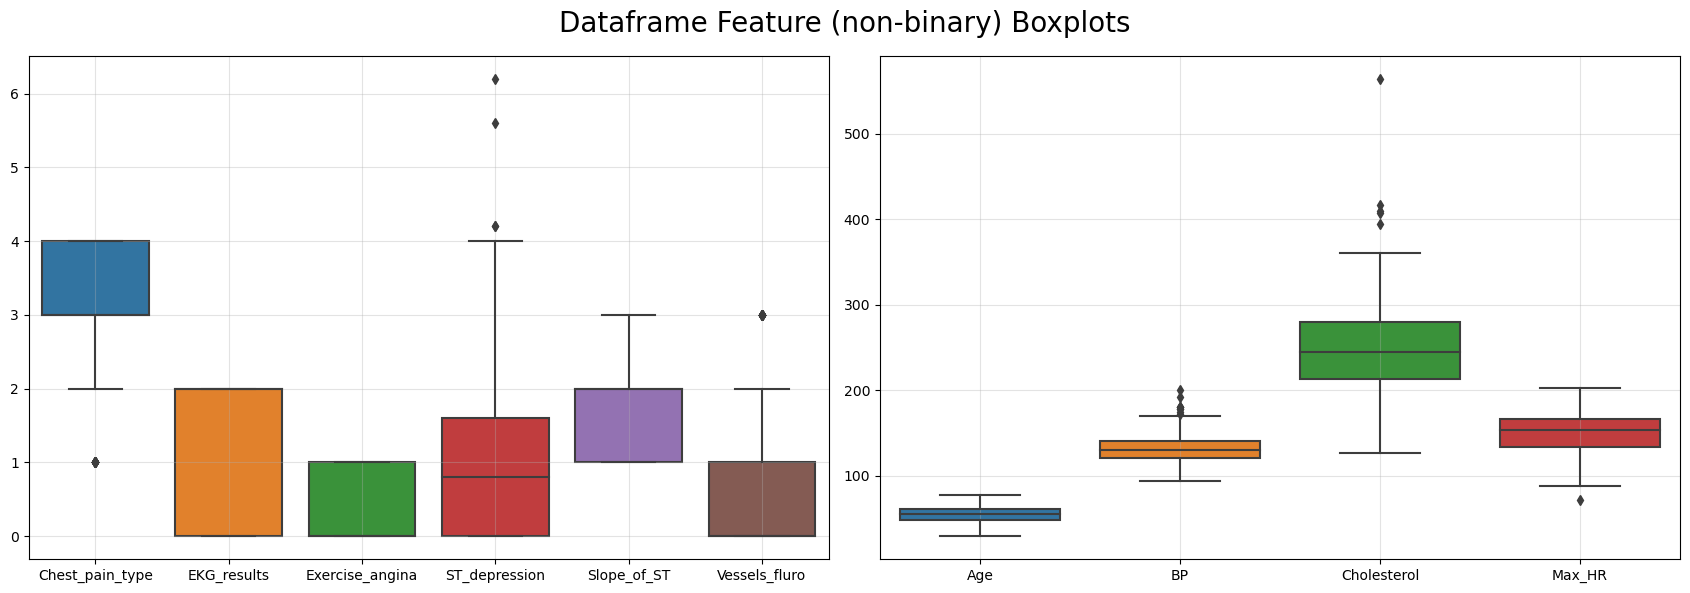

In [61]:
# Seaborn fig with two boxplots for observations (hue is the target Heart_Disease)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =[17,6], sharey=False)

plt.suptitle("Dataframe Feature (non-binary) Boxplots", fontsize=20)

ax1 = sns.boxplot(data=df[["Chest_pain_type", "EKG_results", 
"Exercise_angina", "ST_depression", "Slope_of_ST", "Vessels_fluro"]],ax=ax1)
ax1.grid(alpha=0.35)


ax2 = sns.boxplot(data=df[["Age","BP","Cholesterol","Max_HR"]], ax=ax2)
ax2.grid(alpha=0.35)

plt.tight_layout()
plt.show()

_should I drop the rows with the outliers?_ (revisit this later)

In order to examine the correlation between the multiple variables of the dataset, it should prove useful to create a correlation matrix. 

For that purpose we will be using the Spearman's rank correlation coefficient which measures the strength and direction of a monotonic relationship (which includes both linear and nonlinear relationships) between two variables. 

This tests produces a correlation coefficient that ranges from -1 to 1, where values closer to -1 indicate a negative correlation, values closer to 1 indicate a positive correlation, and values closer to 0 indicate no correlation.

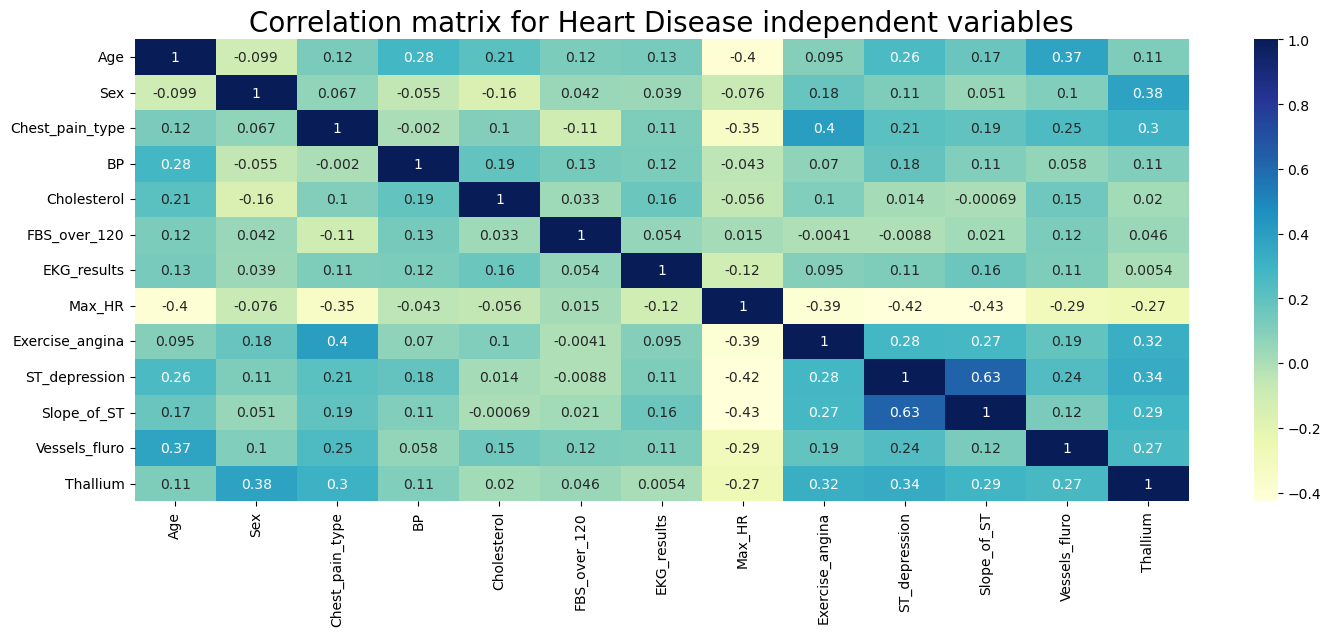

In [55]:
# Calculating the correlation matrix using the Spearman method
corr_matrix = df.corr(method="spearman")

#Plotting a heatmap with the results of the correlation matrix
plt.figure(figsize=[17,6])
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation matrix for Heart Disease independent variables", fontsize=20)
plt.show()

It is apparent that there are correlations between the independent variables of the dataset, therefore we need a way to distinguish the ideal features to consider, when building the Heart disease predictive model.

#### Principal Component Analysis (PCA)

Applying PCA in our dataframe will help determine what are the most important features in order to create a succesful predictive model. PCA will result in reducing the dimensionality of the dataframe and avoiding any detrimental influence for the model from  inherent correlations, between the independent variables.

To perform PCA it is essential to normalize the data. This will ensure that all the features have the same importance in our future model.

Before applying PCA, logistic regression, Random Forest, and SVM, there are several preprocessing steps you should take to ensure your data is clean, standardized, and ready for analysis. Here are some common data preprocessing steps:

Data Cleaning: Check your data for missing values, inconsistent data, or data that may be incorrect. Missing values can be replaced with mean or median values or removed, depending on the context of the problem and the amount of missing data. Inconsistent or incorrect data can be removed or replaced with correct values.

Data Transformation: Scaling or normalizing the data can be necessary to ensure that all the features have the same importance in the model. This is especially important when using PCA or SVM, as these algorithms are sensitive to the scale of the input data. You can use techniques like Min-Max scaling or Standard scaling for data transformation.

Data Encoding: Categorical variables need to be encoded to be used in the model. This can be done using one-hot encoding, label encoding, or ordinal encoding, depending on the type of variable.

Feature Engineering: Creating new features from existing ones can help the model perform better. For example, you can calculate the body mass index (BMI) from the height and weight of the patient, or you can create new features based on domain knowledge or data exploration.

Feature Selection: As mentioned earlier, feature selection can help reduce the dimensionality of the data and improve the performance of the model. You can use PCA or other feature selection methods to select the most important features.

Once the preprocessing is complete, you can use the following methods for analysis:

PCA: Apply PCA to reduce the dimensionality of the data and extract the most important features.
Logistic Regression: Fit a logistic regression model to the data and evaluate its performance using appropriate metrics.

Random Forest: Fit a random forest model to the data and evaluate its performance using appropriate metrics. You can also use the feature importance scores from the random forest to perform feature selection.

SVM: Fit an SVM model to the data and evaluate its performance using appropriate metrics.

It's important to note that the exact preprocessing steps and model selection will depend on the specific problem, the dataset, and the goals of the analysis. It's always a good practice to explore and visualize the data before choosing the appropriate preprocessing and modeling techniques.